# Exploratory Data Analysis of Food Hamper Dataset
**Introduction**

The Islamic Family & Social Services Association (IFSSA) is a social service organization based in Edmonton, Alberta, Canada and provides a range of community services, such as food hampers, crisis support, and assistance for refugees. The organization aims to use artificial intelligence to improve their operations and efficiently tailor their efforts to support the community by addressing challenges faced in the areas of inventory management, resource allocation and delayed / inconsistent information shared with stakeholders.

We have received food hamper dataset consisting of two csv files (Clients Data Dimension and Food Hampers Fact) to analyze and build a machine learning model to predict customer churn over a period of time.

**Problem Statement (Client Retention Classification)**

This problem involves classifying clients to determine if they are likely to return to use IFSSA services within a 3-month time frame. By identifying
client behavior patterns, IFSSA can plan outreach efforts or adjust services to better meet the needs of its clients, ensuring efficient
resource use.

**Approach**

- Import datasets into pandas dataframe.
- Visualize datasets to understand structure, patterns and relationships amongst features.
- Merge dataframes using a column similar to both.
- Clean data and prepare for feature engineering and modeling (remove duplicates, outliers and redundant data, handle missing values by filling or removing).

**Next Steps after EDA**
- Perform Feature Engineering.
- Build model.
- Classify clients into two groups - those that will return to use the service and otherwise.


## **Block 1: Loading and Overview of the Dataset**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# set display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **Loading and overview of Client Data Dimension dataset**


In [ ]:
# Load data from the first Excel file
df1 = pd.read_excel('Clients Data Dimension.xlsx')


# Display the first few rows the DataFrame
df1.head()

,address,address_complement,address_text,age,bio,birthdates,client_status_more_info,communication_barrier,contact_frequency,date_reopened,dependents_qty,emergency_contact_name,emergency_phone_number,english_proficiency_level,external_id,family,household,id_xano,latest_contact_method,latest_language_code,organization,organization_signature,pets,picture,podio_created_on,preferred_contact_method-old-old,preferred_contact_methods,preferred_languages,primary_birthdate,primary_client_key,primary_contact,referral_organizations_allowed,sex,sex_new,status,status_update,urgent_goal,worker,zz_address_txt,Creation Date,Modified Date,Slug,Creator,unique id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,NaN,NaN,NaN,1,1695130222566x921238755334009700,yes,NaN,NaN,NaN,IFSSA,NaN,NaN,NaN,NaT,NaN,Phone Call,NaN,NaT,NaN,1692645608863x866147157948235800,NaN,NaN,NaN,Active,NaN,no,1659409273747x473742471276596300,NaN,2022-09-23 19:07:00,2024-08-22 11:56:00,pod-001,1658438468381x917903915060866600,1663970867191x215057012520910850
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,NaN,NaN,NaN,2,1695130222165x975509409572786600,yes,NaN,NaN,NaN,IFSSA,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,Active,NaN,no,NaN,NaN,2022-09-23 19:09:00,2024-08-22 11:50:00,2,1658438468381x917903915060866600,1663970977536x320239406776320000
2,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,NaN,NaN,NaN,23,1695130222573x705934639754824700,yes,NaN,NaN,NaN,IFSSA,NaN,NaN,NaN,NaT,NaN,NaN,"English , Arabic",NaT,NaN,NaN,NaN,Male,Male,Active,NaN,no,1667329109038x317932150591159600,NaN,2022-11-01 15:27:00,2024-08-22 12:36:00,pod-023,1658438468381x917903915060866600,1667327243288x887165737992192000
3,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,NaN,NaN,NaN,24,1695130222576x869045850202626800,yes,NaN,NaN,NaN,IFSSA,NaN,NaN,NaN,NaT,NaN,NaN,English,NaT,NaN,NaN,NaN,Female,Female,Active,NaN,no,NaN,NaN,2022-11-07 12:12:00,2024-08-22 11:58:00,pod-024,1667329109038x317932150591159600,1667833948363x769349711194751000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-04 17:20:00,1.0,NaN,NaN,NaN,25,1695130222585x474362207170463900,yes,NaN,NaN,NaN,IFSSA,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Male,Male,Active,1696450812192x367068913511604100,no,NaN,NaN,2022-11-07 12:17:00,2024-08-22 12:04:00,pod-025,1667329109038x317932150591159600,1667834247644x935054501347328000


In [ ]:
# printing basic information of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25505 entries, 0 to 25504
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   address                           7264 non-null   object        
 1   address_complement                494 non-null    object        
 2   address_text                      6375 non-null   object        
 3   age                               25082 non-null  float64       
 4   bio                               5 non-null      object        
 5   birthdates                        25088 non-null  object        
 6   client_status_more_info           59 non-null     object        
 7   communication_barrier             0 non-null      float64       
 8   contact_frequency                 202 non-null    object        
 9   date_reopened                     13135 non-null  datetime64[ns]
 10  dependents_qty                    20591 non-nu

In [ ]:
# checking df1 shape
df1.shape

(25505, 44)

In [ ]:
# checking df1 data type
df1.dtypes

,0
address,object
address_complement,object
address_text,object
age,float64
bio,object
birthdates,object
client_status_more_info,object
communication_barrier,float64
contact_frequency,object
date_reopened,datetime64[ns]


In [ ]:
# check for missing values in df1
df1.isnull().sum()

,0
address,18241
address_complement,25011
address_text,19130
age,423
bio,25500
birthdates,417
client_status_more_info,25446
communication_barrier,25505
contact_frequency,25303
date_reopened,12370


In [ ]:
# listing of columns in df1
df1.columns

Index(['address', 'address_complement', 'address_text', 'age', 'bio',
       'birthdates', 'client_status_more_info', 'communication_barrier',
       'contact_frequency', 'date_reopened', 'dependents_qty',
       'emergency_contact_name', 'emergency_phone_number',
       'english_proficiency_level', 'external_id', 'family', 'household',
       'id_xano', 'latest_contact_method', 'latest_language_code',
       'organization', 'organization_signature', 'pets', 'picture',
       'podio_created_on', 'preferred_contact_method-old-old',
       'preferred_contact_methods', 'preferred_languages', 'primary_birthdate',
       'primary_client_key', 'primary_contact',
       'referral_organizations_allowed', 'sex', 'sex_new', 'status',
       'status_update', 'urgent_goal', 'worker', 'zz_address_txt',
       'Creation Date', 'Modified Date', 'Slug', 'Creator', 'unique id'],
      dtype='object')

### **Loading and overview of Food Hampers Fact dataset**

In [ ]:
# Load data from the second Excel file
df2 = pd.read_excel('Food Hampers Fact.xlsx')

# Display the first five rows the DataFrame
df2.head()

,agent_collect,agent_collect_note,agent_related,appointment_contact,appointment_participants,appointment_type,cal_color,client_collected,client_list,collect_scheduled_date,collect_token,confirmed,contact_method,datetime_from,datetime_to,details,g_event_id,g_event_link,hamper_confirmation_type,hamper_type,id_xano,marked_off,meeting_link,organization,pickup_date,pickup_location,qrcode,quantity,related_scheduler,staff_invited,timezone,title,unique_client,where,Creation Date,Modified Date,Slug,Creator,unique id
0,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-07-27,9CHJ75,NaN,In-Person,2023-07-27,2023-07-27,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,https://794169daf8af9588f2897c3e9a4096d8.cdn.b...,1,1690484248195x781303437208059900,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484251501x480105574053396160
1,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-08-26,1VYMC5,NaN,In-Person,2023-08-26,2023-08-26,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,https://794169daf8af9588f2897c3e9a4096d8.cdn.b...,1,1690484248195x781303437208059900,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484266053x272870528999898500
2,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-09-25,QHWDXG,NaN,In-Person,2023-09-25,2023-09-25,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,https://794169daf8af9588f2897c3e9a4096d8.cdn.b...,1,1690484248195x781303437208059900,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484268062x404921931938873500
3,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-10-25,6SAN43,NaN,In-Person,2023-10-25,2023-10-25,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,https://794169daf8af9588f2897c3e9a4096d8.cdn.b...,1,1690484248195x781303437208059900,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484269673x683706627103465300
4,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-11-24,TMXAOB,NaN,In-Person,2023-11-24,2023-11-24,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,https://794169daf8af9588f2897c3e9a4096d8.cdn.b...,1,1690484248195x781303437208059900,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484271378x480307445517271800


In [ ]:
# printing basic information of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   agent_collect             7025 non-null   object        
 1   agent_collect_note        5566 non-null   object        
 2   agent_related             16605 non-null  object        
 3   appointment_contact       0 non-null      float64       
 4   appointment_participants  12313 non-null  object        
 5   appointment_type          16605 non-null  object        
 6   cal_color                 7025 non-null   object        
 7   client_collected          8957 non-null   object        
 8   client_list               16486 non-null  object        
 9   collect_scheduled_date    16602 non-null  datetime64[ns]
 10  collect_token             16605 non-null  object        
 11  confirmed                 2915 non-null   object        
 12  contact_method    

In [ ]:
# checking df2 shape
df2.shape

(16605, 39)

In [ ]:
# checking df2 data types
df2.dtypes

,0
agent_collect,object
agent_collect_note,object
agent_related,object
appointment_contact,float64
appointment_participants,object
appointment_type,object
cal_color,object
client_collected,object
client_list,object
collect_scheduled_date,datetime64[ns]


In [ ]:
# check for missing values in df2
df2.isnull().sum()

,0
agent_collect,9580
agent_collect_note,11039
agent_related,0
appointment_contact,16605
appointment_participants,4292
appointment_type,0
cal_color,9580
client_collected,7648
client_list,119
collect_scheduled_date,3


In [ ]:
# listing of columns in df2
df2.columns

Index(['agent_collect', 'agent_collect_note', 'agent_related',
       'appointment_contact', 'appointment_participants', 'appointment_type',
       'cal_color', 'client_collected', 'client_list',
       'collect_scheduled_date', 'collect_token', 'confirmed',
       'contact_method', 'datetime_from', 'datetime_to', 'details',
       'g_event_id', 'g_event_link', 'hamper_confirmation_type', 'hamper_type',
       'id_xano', 'marked_off', 'meeting_link', 'organization', 'pickup_date',
       'pickup_location', 'qrcode', 'quantity', 'related_scheduler',
       'staff_invited', 'timezone', 'title', 'unique_client', 'where',
       'Creation Date', 'Modified Date', 'Slug', 'Creator', 'unique id'],
      dtype='object')

### **Initial Data Visualization before cleaning (df1)**


**1. Age Distribution of Clients:**

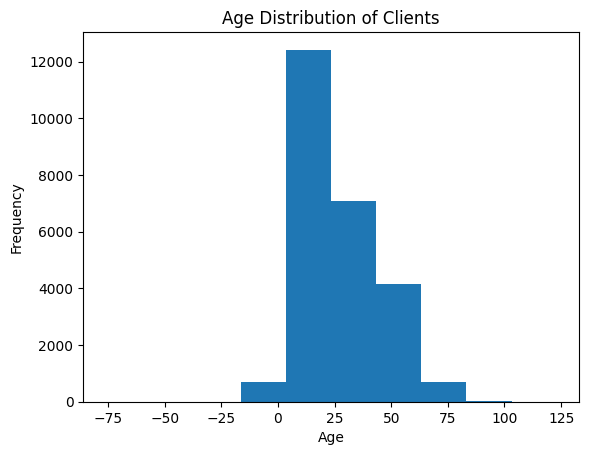

In [ ]:
# plotting histogram to show age distribution
plt.hist(df1['age'], bins=10)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**2. Relationship between Age and Number of Dependents:**

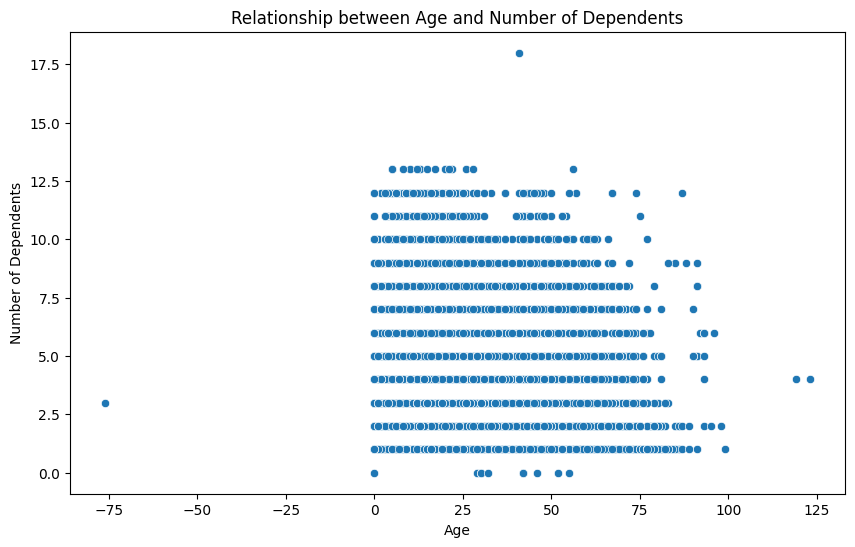

In [ ]:
# scatter plot of Age vs Number of Dependents
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='age', y='dependents_qty', data=df1)
plt.title('Relationship between Age and Number of Dependents')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.show()

**3. Distribution of English Proficiency Levels**

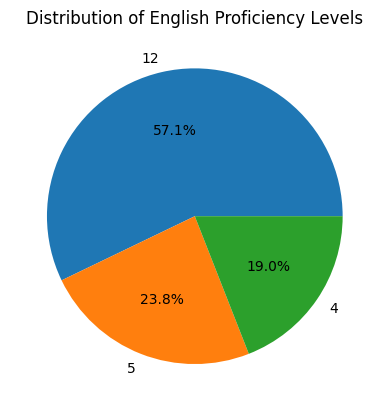

In [ ]:
#plot pie chart
plt.pie(df1['english_proficiency_level'].value_counts(), labels=df1['english_proficiency_level'].value_counts().to_list(), autopct='%1.1f%%')
plt.title('Distribution of English Proficiency Levels')
plt.show()

**4. Distribution of Preferred Contact Methods**

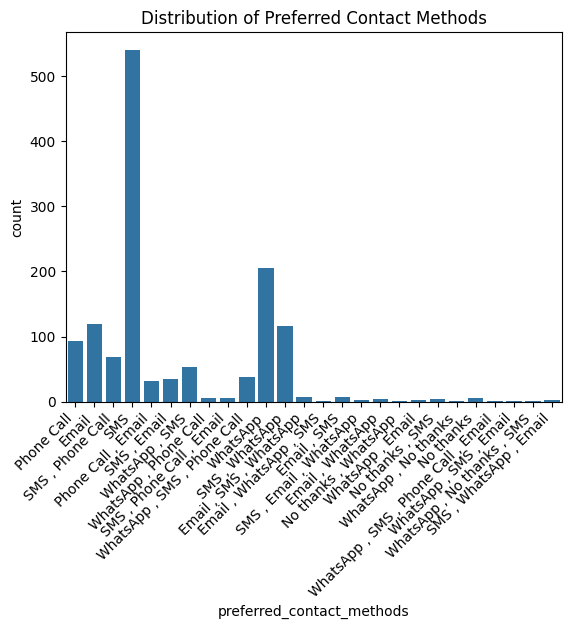

In [ ]:
# preferred contact distribution
sns.countplot(x='preferred_contact_methods', data=df1)
plt.title('Distribution of Preferred Contact Methods')
plt.xticks(rotation=45, ha='right')
plt.show()

**5. Distribution of Sex**

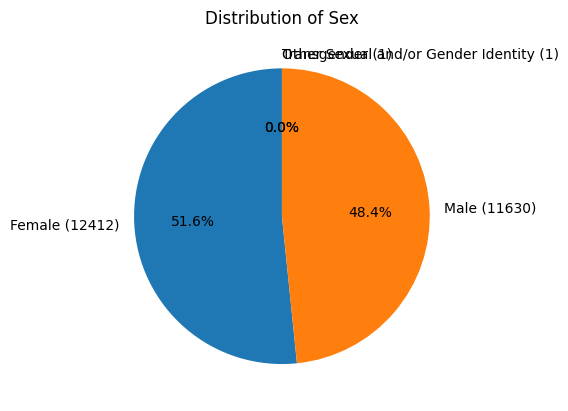

In [ ]:
sex_counts = df1['sex'].value_counts()

# Create the pie chart with value counts in labels
plt.pie(sex_counts, labels=[f"{label} ({count})" for label, count in sex_counts.items()],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.show()

**6. Distribution of Client Statuses**

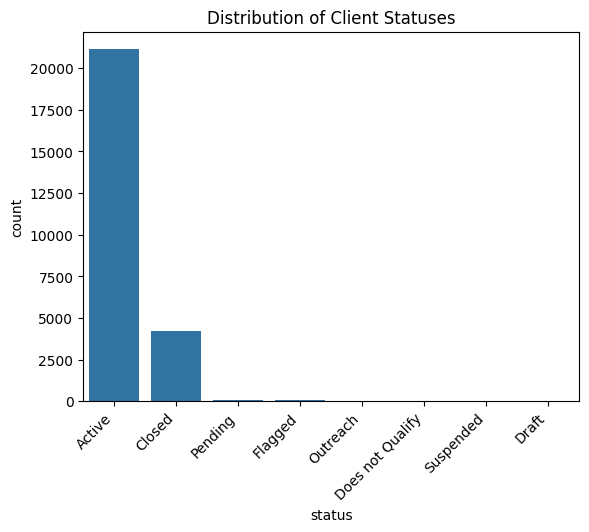

In [ ]:
sns.countplot(x='status', data=df1)
plt.title('Distribution of Client Statuses')
plt.xticks(rotation=45, ha='right')
plt.show()

**7. Correlation matrix for df1**

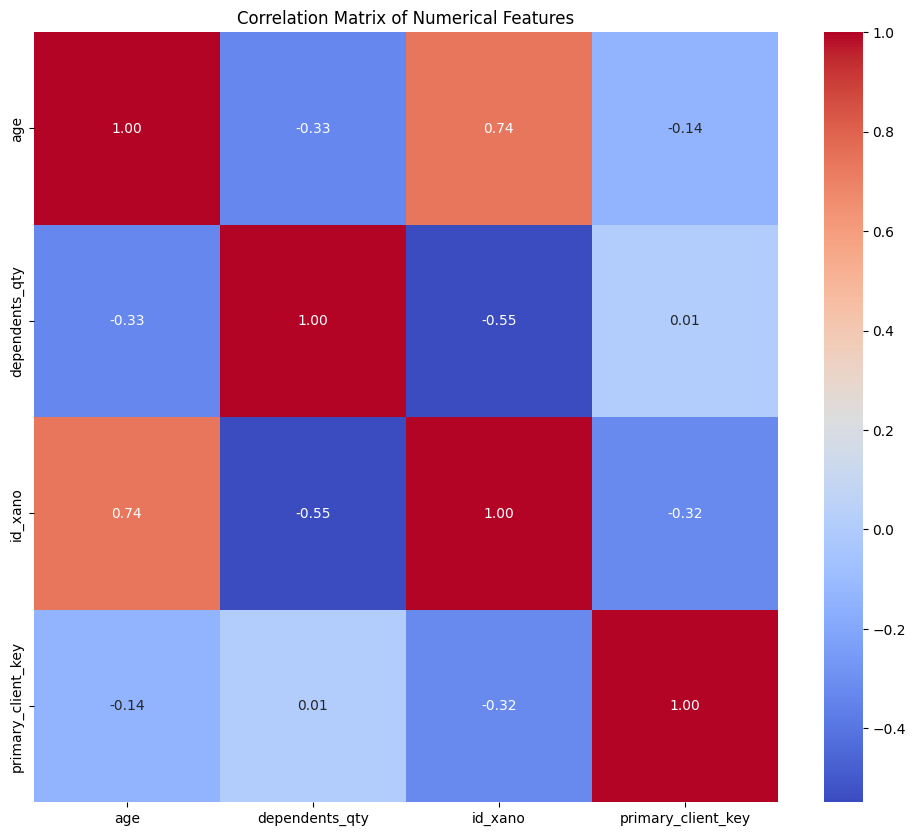

In [ ]:
# Select numerical features for correlation analysis
numerical_features = ['age', 'dependents_qty',
                  'id_xano', 'primary_client_key']

# Calculate the correlation matrix
correlation_matrix = df1[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**8. Boxplot for df1**

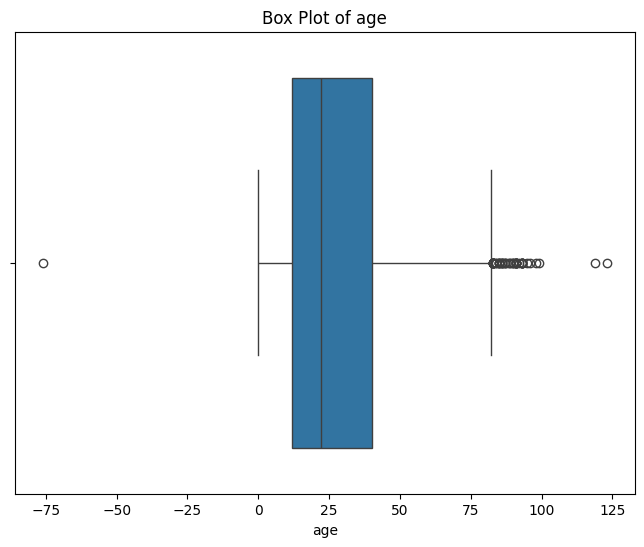

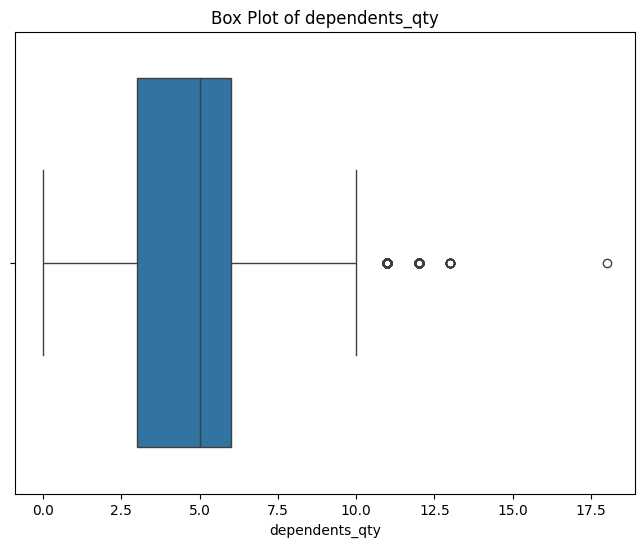

In [ ]:
#numerical columns for outlier detection
numerical_cols = ['age', 'dependents_qty']

# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=df1[col])  # Assuming df1 contains the columns
    plt.title(f'Box Plot of {col}')
    plt.show()

### **Initial Data Visualization before cleaning (df2 - Food Hampers Fact)**

**1. Distribution of Food Hamper Types**

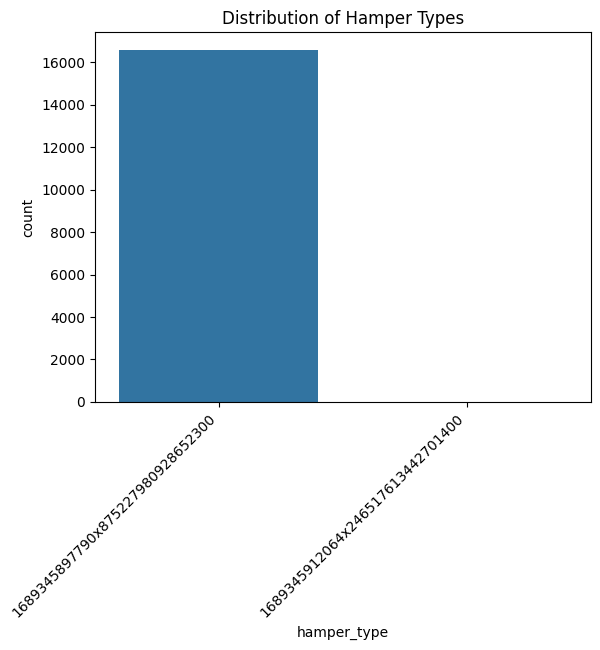

In [ ]:
sns.countplot(x='hamper_type', data=df2)
plt.title('Distribution of Hamper Types')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**2. Hampers Distributed Over Time:**

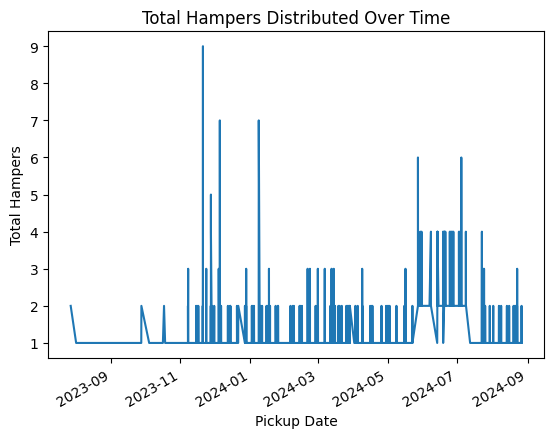

In [ ]:
df2.groupby('pickup_date')['quantity'].sum().plot(kind='line')
plt.title('Total Hampers Distributed Over Time')
plt.xlabel('Pickup Date')
plt.ylabel('Total Hampers')
plt.show()

**3. Relationship between Appointment Type and Confirmation:**

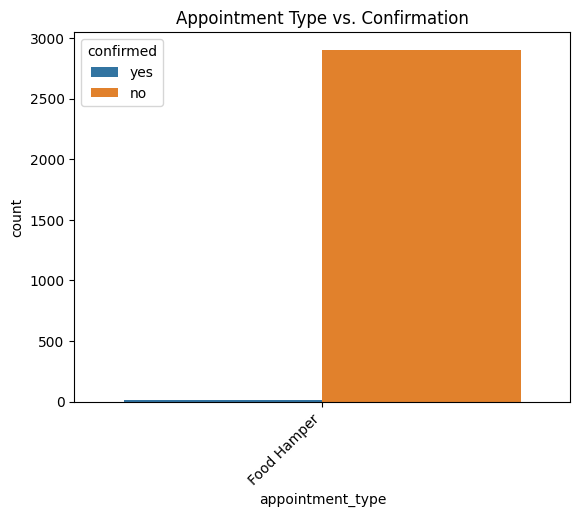

In [ ]:
sns.countplot(x='appointment_type', hue='confirmed', data=df2)
plt.title('Appointment Type vs. Confirmation')
plt.xticks(rotation=45, ha='right')
plt.show()

**4. Appointment confirmation distribution**

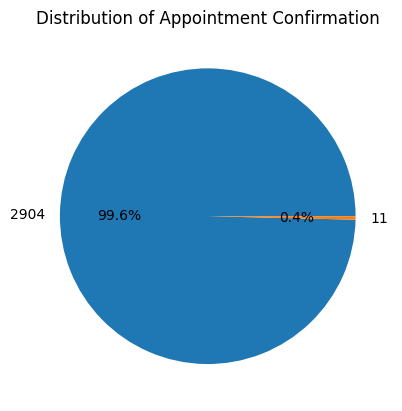

In [ ]:
# plot pie chart for appointment confirmation
plt.pie(df2['confirmed'].value_counts(), labels=df2['confirmed'].value_counts().to_list(), autopct='%1.1f%%')
plt.title('Distribution of Appointment Confirmation')
plt.show()

**5. Appointment type distribution**

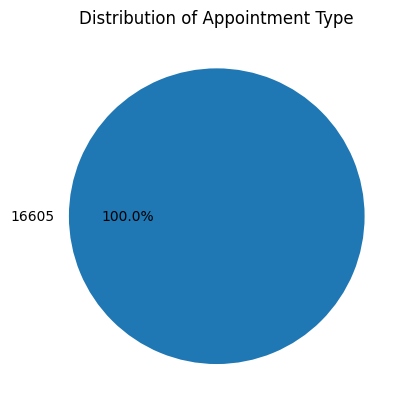

In [ ]:
# plot pie chart for appointment type
plt.pie(df2['appointment_type'].value_counts(), labels=df2['appointment_type'].value_counts().to_list(), autopct='%1.1f%%')
plt.title('Distribution of Appointment Type')
plt.show()

**6. Distribution of Pickup Locations**

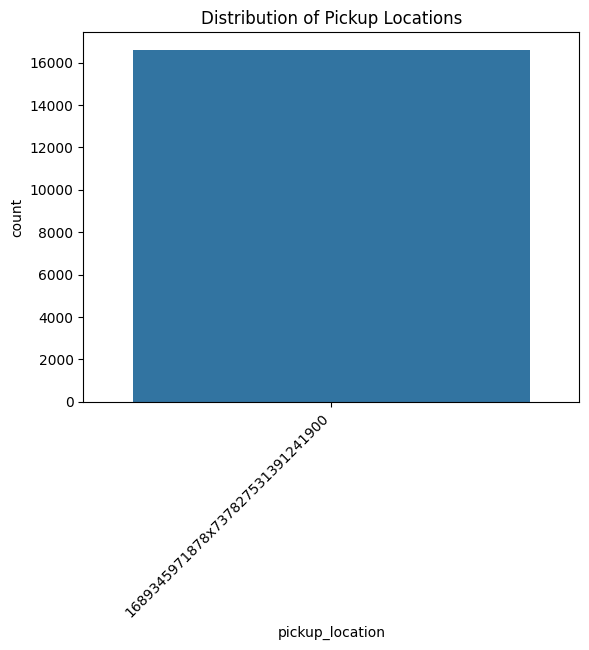

In [ ]:
#plotting distribution of pickup locations
sns.countplot(x='pickup_location', data=df2)
plt.title('Distribution of Pickup Locations')
plt.xticks(rotation=45, ha='right')
plt.show()

## **Block 2: Data Cleaning and Preparation**


### **Data Merging**

**We identified many of the features in both dataframes have missing values but will go ahead to merge the two dataframes based on client_list (from the df2)  and unique id (from the df1).**

In [ ]:
# merge df1 and df2
merged_df = pd.merge(df2, df1, left_on='client_list', right_on='unique id', how='left')

In [ ]:
merged_df.to_csv("merged_data.csv", index=False)


In [ ]:
#displaying first 5 rows of the merged df
merged_df.head(5)

,agent_collect,agent_collect_note,agent_related,appointment_contact,appointment_participants,appointment_type,cal_color,client_collected,client_list,collect_scheduled_date,collect_token,confirmed,contact_method,datetime_from,datetime_to,details,g_event_id,g_event_link,hamper_confirmation_type,hamper_type,id_xano_x,marked_off,meeting_link,organization_x,pickup_date,pickup_location,qrcode,quantity,related_scheduler,staff_invited,timezone,title,unique_client,where,Creation Date_x,Modified Date_x,Slug_x,Creator_x,unique id_x,address,address_complement,address_text,age,bio,birthdates,client_status_more_info,communication_barrier,contact_frequency,date_reopened,dependents_qty,emergency_contact_name,emergency_phone_number,english_proficiency_level,external_id,family,household,id_xano_y,latest_contact_method,latest_language_code,organization_y,organization_signature,pets,picture,podio_created_on,preferred_contact_method-old-old,preferred_contact_methods,preferred_languages,primary_birthdate,primary_client_key,primary_contact,referral_organizations_allowed,sex,sex_new,status,status_update,urgent_goal,worker,zz_address_txt,Creation Date_y,Modified Date_y,Slug_y,Creator_y,unique id_y
0,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-07-27,9CHJ75,NaN,In-Person,2023-07-27,2023-07-27,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,https://794169daf8af9588f2897c3e9a4096d8.cdn.b...,1,1690484248195x781303437208059900,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484251501x480105574053396160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-08-26,1VYMC5,NaN,In-Person,2023-08-26,2023-08-26,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,https://794169daf8af9588f2897c3e9a4096d8.cdn.b...,1,1690484248195x781303437208059900,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484266053x272870528999898500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-09-25,QHWDXG,NaN,In-Person,2023-09-25,2023-09-25,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,https://794169daf8af9588f2897c3e9a4096d8.cdn.b...,1,1690484248195x781303437208059900,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484268062x404921931938873500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-10-25,6SAN43,NaN,In-Person,2023-10-25,2023-10-25,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,https://794169daf8af9588f2897c3e9a4096d8.cdn.b...,1,1690484248195x781303437208059900,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484269673x683706627103465300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-11-24,TMXAOB,NaN,In-Person,2023-11-24,2023-11-24,NaN,NaN,NaN,NaN,1689345897790x875227980928652300,NaN,no,NaN,IFSSA,NaT,1689345971878x737827531391241900,

In [ ]:
# checking basic info of the merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 83 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   agent_collect                     7025 non-null   object        
 1   agent_collect_note                5566 non-null   object        
 2   agent_related                     16605 non-null  object        
 3   appointment_contact               0 non-null      float64       
 4   appointment_participants          12313 non-null  object        
 5   appointment_type                  16605 non-null  object        
 6   cal_color                         7025 non-null   object        
 7   client_collected                  8957 non-null   object        
 8   client_list                       16486 non-null  object        
 9   collect_scheduled_date            16602 non-null  datetime64[ns]
 10  collect_token                     16605 non-nu

In [ ]:
# checking the shape of the merged dataframe
merged_df.shape

(16605, 83)

- **The number of rows of data in the merged dataframe is consistent with that in the df2 which is the contains information about hampers given to customers.**

- **The number of columns has increased to 83 reflecting summation of columns in both dataframes after merging.**

In [ ]:
# listing of columns in merged_df
merged_df.columns

Index(['agent_collect', 'agent_collect_note', 'agent_related',
       'appointment_contact', 'appointment_participants', 'appointment_type',
       'cal_color', 'client_collected', 'client_list',
       'collect_scheduled_date', 'collect_token', 'confirmed',
       'contact_method', 'datetime_from', 'datetime_to', 'details',
       'g_event_id', 'g_event_link', 'hamper_confirmation_type', 'hamper_type',
       'id_xano_x', 'marked_off', 'meeting_link', 'organization_x',
       'pickup_date', 'pickup_location', 'qrcode', 'quantity',
       'related_scheduler', 'staff_invited', 'timezone', 'title',
       'unique_client', 'where', 'Creation Date_x', 'Modified Date_x',
       'Slug_x', 'Creator_x', 'unique id_x', 'address', 'address_complement',
       'address_text', 'age', 'bio', 'birthdates', 'client_status_more_info',
       'communication_barrier', 'contact_frequency', 'date_reopened',
       'dependents_qty', 'emergency_contact_name', 'emergency_phone_number',
       'english_profic

In [ ]:
# checking for duplicate entries in the merged dataframe
merged_df.duplicated().sum()

np.int64(0)

In [ ]:
# Checking for missing values in merged_df
missing_values = merged_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
agent_collect                        9580
agent_collect_note                  11039
agent_related                           0
appointment_contact                 16605
appointment_participants             4292
appointment_type                        0
cal_color                            9580
client_collected                     7648
client_list                           119
collect_scheduled_date                  3
collect_token                           0
confirmed                           13690
contact_method                          0
datetime_from                           1
datetime_to                             6
details                             14337
g_event_id                          16605
g_event_link                        16605
hamper_confirmation_type             9580
hamper_type                             0
id_xano_x                           13700
marked_off                              0
meeting_link                        16605
organization_x    

In [ ]:
# Checking the missing percentage and sorting in descending order
missing_percentage = (missing_values / len(merged_df)) * 100

missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print("\nMissing Values Percentage (Sorted):")
print(missing_percentage_sorted)


Missing Values Percentage (Sorted):
g_event_id                          100.000000
g_event_link                        100.000000
appointment_contact                 100.000000
emergency_phone_number              100.000000
preferred_contact_method-old-old    100.000000
emergency_contact_name              100.000000
communication_barrier               100.000000
Slug_x                              100.000000
where                               100.000000
pets                                100.000000
organization_signature              100.000000
staff_invited                       100.000000
meeting_link                        100.000000
timezone                             99.969889
picture                              99.855465
english_proficiency_level            99.831376
id_xano_y                            99.765131
referral_organizations_allowed       99.692864
bio                                  99.626618
client_status_more_info              98.638964
primary_client_key     

**Beginning of data cleaning process**

**1. Removing unnecessary columns**

We will be removing the the underlisted columns from the merged dataframe because they are blank, redundant or duplicates.
- "organization_signature",
- "staff_invited",
- "appointment_contact",
- "g_event_link",
- "communication_barrier",
- "Slug_x",
- "meeting_link",
- "where",
- "emergency_contact_name",
- "g_event_id",
- "emergency_phone_number",
- "pets",
- "preferred_contact_method-old-old",
- "timezone",
- "picture",
- "id_xano_y",
- "referral_organizations_allowed",
- "bio",
- "details",
- "address_complement",
- "id_xano_x",
- "status_update",
- "cal_color",
- "agent_collect",
- "latest_language_code",
- "worker",
- "appointment_participants",
- "podio_created_on",
- "zz_address_txt",
- "address_text",
- "sex",
- "external_id",
- "primary_contact",
- "primary_birthdate",
- "family",
- "urgent_goal",
- "Slug_y",
- "Creator_y",
- "organization_y",
- "unique_client",
- "qrcode",
- "related_scheduler",
- "marked_off",
- "appointment_type",
- "unique id_x",
- "Creator_x",
- "agent_related",
- "collect_token",
- "contact_method",
- "pickup_location",
- "organization_x",
- "english_proficiency_level",
- "primary_client_key",
- "unique id_y"


In [ ]:
# remove unwanted columns from dataframe

columns_to_remove = ["organization_signature",
"staff_invited",
"appointment_contact",
"g_event_link",
"communication_barrier",
"Slug_x",
"meeting_link",
"where",
"emergency_contact_name",
"g_event_id",
"emergency_phone_number",
"pets",
"preferred_contact_method-old-old",
"timezone",
"picture",
"id_xano_y",
"referral_organizations_allowed",
"bio",
"details",
"address_complement",
"id_xano_x",
"status_update",
"cal_color",
"agent_collect",
"latest_language_code",
"worker",
"appointment_participants",
"podio_created_on",
"zz_address_txt",
"address_text",
"sex",
"external_id",
"primary_contact",
"primary_birthdate",
"family",
"urgent_goal",
"Slug_y",
"Creator_y",
"organization_y",
"unique_client",
"qrcode",
"related_scheduler",
"marked_off",
"appointment_type",
"unique id_x",
"Creator_x",
"agent_related",
"collect_token",
"contact_method",
"pickup_location",
"organization_x", "english_proficiency_level", "primary_client_key", "unique id_y"]

In [ ]:
df_merged_new = merged_df.drop(columns=columns_to_remove, axis = 1)

In [ ]:
# listing columns in the merged dataframe after removing redundant ones
df_merged_new.columns

Index(['agent_collect_note', 'client_collected', 'client_list',
       'collect_scheduled_date', 'confirmed', 'datetime_from', 'datetime_to',
       'hamper_confirmation_type', 'hamper_type', 'pickup_date', 'quantity',
       'title', 'Creation Date_x', 'Modified Date_x', 'address', 'age',
       'birthdates', 'client_status_more_info', 'contact_frequency',
       'date_reopened', 'dependents_qty', 'household', 'latest_contact_method',
       'preferred_contact_methods', 'preferred_languages', 'sex_new', 'status',
       'Creation Date_y', 'Modified Date_y'],
      dtype='object')

In [ ]:
# printing basic information of merged dataframe
df_merged_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_collect_note         5566 non-null   object        
 1   client_collected           8957 non-null   object        
 2   client_list                16486 non-null  object        
 3   collect_scheduled_date     16602 non-null  datetime64[ns]
 4   confirmed                  2915 non-null   object        
 5   datetime_from              16604 non-null  datetime64[ns]
 6   datetime_to                16599 non-null  datetime64[ns]
 7   hamper_confirmation_type   7025 non-null   object        
 8   hamper_type                16605 non-null  object        
 9   pickup_date                7025 non-null   datetime64[ns]
 10  quantity                   16605 non-null  int64         
 11  title                      16605 non-null  object        
 12  Crea

**2. Checking and removing duplicates (if present).**

In [ ]:
# check for duplicates
df_merged_new.duplicated().sum()


np.int64(0)

**There are no duplicates in the dataset**

**3. Create new_age column**

**We observed birthdate column has less missing values than the age, so we decided to create a new column called new_age from the birthdate and replace age column with this new_age**

In [ ]:
from datetime import datetime

# Convert 'birthdates' column to datetime objects
df_merged_new['new_birthdates'] = pd.to_datetime(df_merged_new['birthdates'], format="%b %d, %Y %H:%M", errors='coerce')


In [ ]:
current_date = datetime.today()

# Create the 'Days_taken' column
df_merged_new['new_age'] = current_date - df_merged_new['new_birthdates']

# Calculate the mode of the 'age' column before filling NaNs
age_mode = df_merged_new['age'].mode()[0]  # Calculate mode here

df_merged_new['new_age_years'] = (df_merged_new['new_age'].dt.days / 365.25).fillna(age_mode).astype(int)
# df_merged_new['new_age_years'] = (df_merged_new['new_age'].dt.days / 365.25).fillna(-1).astype(int)


# Now you can access the 'new_age_years' column
df_merged_new['new_age_years'].head()

,new_age_years
0,38
1,38
2,38
3,38
4,38


In [ ]:
# validating the decrease in the number of missing cells in new_age_years column as opposed to age column
print(df_merged_new['new_age_years'].value_counts().sum())
print(df_merged_new['age'].value_counts().sum())

16605
16042


In [ ]:
df_cleaned = df_merged_new.copy()

In [ ]:
# removing new_age, new_birthdates, 'age', and 'birthdates because they are now redundant
df_cleaned = df_cleaned.drop(columns=['new_age', 'new_birthdates', 'age', 'birthdates'])

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_collect_note         5566 non-null   object        
 1   client_collected           8957 non-null   object        
 2   client_list                16486 non-null  object        
 3   collect_scheduled_date     16602 non-null  datetime64[ns]
 4   confirmed                  2915 non-null   object        
 5   datetime_from              16604 non-null  datetime64[ns]
 6   datetime_to                16599 non-null  datetime64[ns]
 7   hamper_confirmation_type   7025 non-null   object        
 8   hamper_type                16605 non-null  object        
 9   pickup_date                7025 non-null   datetime64[ns]
 10  quantity                   16605 non-null  int64         
 11  title                      16605 non-null  object        
 12  Crea

**4. Filling missing values**

In [ ]:

# df_cleaned['dependents_qty'].fillna(0, inplace=True)

df_cleaned['agent_collect_note'].fillna('No Note', inplace=True)

# fill nan in 'client_collected column to Unknown
df_cleaned['client_collected'].fillna('Unknown', inplace=True)

# fill nan in 'collect_scheduled_date column to Unknown
df_cleaned['collect_scheduled_date'].fillna('Unknown', inplace=True)

# fill nan in confirmed column to Unknown
df_cleaned['confirmed'].fillna('Unknown', inplace=True)

# fill nan in datetime_from column to Unknown
df_cleaned['datetime_from'].fillna('Unknown', inplace=True)

# fill nan in datetime_to column to Unknown
df_cleaned['datetime_to'].fillna('Unknown', inplace=True)

# fill nan in hamper_confirmation_type column to Unknown
df_cleaned['hamper_confirmation_type'].fillna('Unknown', inplace=True)

# fill nan in pickup_date column to Unknown
df_cleaned['pickup_date'].fillna('Unknown', inplace=True)

# fill nan in address column to Unknown
df_cleaned['address'].fillna('Unknown', inplace=True)

# fill nan in client_status_more_info column to Unknown
df_cleaned['client_status_more_info'].fillna('No notes', inplace=True)

# fill nan in contact_frequency column to Unknown
df_cleaned['contact_frequency'].fillna('Unknown', inplace=True)

# fill nan in date_reopened column to Unknown
df_cleaned['date_reopened'].fillna('Unknown', inplace=True)

# fill with mode
df_cleaned['dependents_qty'].fillna(df_cleaned['dependents_qty'].mode()[0], inplace=True)

# fill nan in household column to Unknown
df_cleaned['household'].fillna('Unknown', inplace=True)

# replace ' Female' with 'Female' to remove trailing spaces
df_cleaned['sex_new'].replace(' Female', 'Female', inplace=True)

# fill nan in sex_new column to Unknown
df_cleaned['sex_new'].fillna('Unknown', inplace=True)

# fill nan in latest_contact_method column to Unknown
# df_cleaned['dependents_qty'].fillna(0, inplace=True)

# fill nan in agent_collect_note column to Unknown
df_cleaned['agent_collect_note'].fillna('No Note', inplace=True)

# fill nan in 'client_collected column to Unknown
df_cleaned['client_collected'].fillna('Unknown', inplace=True)

# fill nan in 'client_collected column to Unknown
df_cleaned['client_list'].fillna('Unknown', inplace=True)

# fill nan in 'collect_scheduled_date column to Unknown
df_cleaned['collect_scheduled_date'].fillna('Unknown', inplace=True)

# fill nan in confirmed column to Unknown
df_cleaned['confirmed'].fillna('Unknown', inplace=True)

# fill nan in datetime_from column to Unknown
df_cleaned['datetime_from'].fillna('Unknown', inplace=True)

# fill nan in datetime_to column to Unknown
df_cleaned['datetime_to'].fillna('Unknown', inplace=True)

# fill nan in hamper_confirmation_type column to Unknown
df_cleaned['hamper_confirmation_type'].fillna('Unknown', inplace=True)

# fill nan in pickup_date column to Unknown
df_cleaned['pickup_date'].fillna('Unknown', inplace=True)

# fill nan in address column to Unknown
df_cleaned['address'].fillna('Unknown', inplace=True)

# fill nan in client_status_more_info column to Unknown
df_cleaned['client_status_more_info'].fillna('No notes', inplace=True)

# fill nan in contact_frequency column to Unknown
df_cleaned['contact_frequency'].fillna('Unknown', inplace=True)

# fill nan in date_reopened column to Unknown
df_cleaned['date_reopened'].fillna('Unknown', inplace=True)

# fill with mode
df_cleaned['dependents_qty'].fillna(df_cleaned['dependents_qty'].mode()[0], inplace=True)

# fill nan in household column to Unknown
df_cleaned['household'].fillna('Unknown', inplace=True)

# replace ' Female' with 'Female' to remove trailing spaces
df_cleaned['sex_new'].replace(' Female', 'Female', inplace=True)

# fill nan in sex_new column to Unknown
df_cleaned['sex_new'].fillna('Unknown', inplace=True)

# fill nan in latest_contact_method column to Unknown
df_cleaned['latest_contact_method'].fillna('Unknown', inplace=True)

# fill nan in preferred_contact_methods column to Unknown
df_cleaned['preferred_contact_methods'].fillna('Unknown', inplace=True)

# fill nan in preferred_languages column to Unknown
df_cleaned['preferred_languages'].fillna('Unknown', inplace=True)

# fill nan in status column to Unknown
df_cleaned['status'].fillna('Unknown', inplace=True)

# fill nan in Creation Date_y column to Unknown
df_cleaned['Creation Date_y'].fillna('Unknown', inplace=True)

# fill nan in Modified Date_y column to Unknown
df_cleaned['Modified Date_y'].fillna('Unknown', inplace=True)
# fill nan in preferred_contact_methods column to Unknown
df_cleaned['preferred_contact_methods'].fillna('Unknown', inplace=True)

# fill nan in preferred_languages column to Unknown
df_cleaned['preferred_languages'].fillna('Unknown', inplace=True)

# fill nan in status column to Unknown
df_cleaned['status'].fillna('Unknown', inplace=True)

# fill nan in Creation Date_y column to Unknown
df_cleaned['Creation Date_y'].fillna('Unknown', inplace=True)

# fill nan in Modified Date_y column to Unknown
df_cleaned['Modified Date_y'].fillna('Unknown', inplace=True)




<ipython-input-49-f3c65bbaabc1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['agent_collect_note'].fillna('No Note', inplace=True)
<ipython-input-49-f3c65bbaabc1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# validating all missing columns are now filled
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_collect_note         16605 non-null  object        
 1   client_collected           16605 non-null  object        
 2   client_list                16605 non-null  object        
 3   collect_scheduled_date     16605 non-null  object        
 4   confirmed                  16605 non-null  object        
 5   datetime_from              16605 non-null  object        
 6   datetime_to                16605 non-null  object        
 7   hamper_confirmation_type   16605 non-null  object        
 8   hamper_type                16605 non-null  object        
 9   pickup_date                16605 non-null  object        
 10  quantity                   16605 non-null  int64         
 11  title                      16605 non-null  object        
 12  Crea

**5. Convert date columns to datetime format.**

In [ ]:
# Convert date columns to datetime format
df_cleaned['pickup_date'] = pd.to_datetime(df_cleaned['pickup_date'], errors='coerce')
df_cleaned['collect_scheduled_date'] = pd.to_datetime(df_cleaned['collect_scheduled_date'], errors='coerce')
df_cleaned['datetime_from'] = pd.to_datetime(df_cleaned['datetime_from'], errors='coerce')
df_cleaned['datetime_to'] = pd.to_datetime(df_cleaned['datetime_to'], errors='coerce')
df_cleaned['date_reopened'] = pd.to_datetime(df_cleaned['date_reopened'], errors='coerce')
df_cleaned['Modified Date_y'] = pd.to_datetime(df_cleaned['Modified Date_y'], errors='coerce')
df_cleaned['Creation Date_y'] = pd.to_datetime(df_cleaned['Creation Date_y'], errors='coerce')

<ipython-input-51-3a9070665e59>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['pickup_date'] = pd.to_datetime(df_cleaned['pickup_date'], errors='coerce')
<ipython-input-51-3a9070665e59>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['date_reopened'] = pd.to_datetime(df_cleaned['date_reopened'], errors='coerce')
<ipython-input-51-3a9070665e59>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Modified Date_y'] = pd.to_datetime(df_cleaned['Modified Date_y'], errors='coerce')
<ipython-input-51-3a9070665e59>:8: UserWarning: Could not infer 

In [ ]:
# validating all columns erroneously assigned object dtypes are now in datetime format
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_collect_note         16605 non-null  object        
 1   client_collected           16605 non-null  object        
 2   client_list                16605 non-null  object        
 3   collect_scheduled_date     16602 non-null  datetime64[ns]
 4   confirmed                  16605 non-null  object        
 5   datetime_from              16604 non-null  datetime64[ns]
 6   datetime_to                16599 non-null  datetime64[ns]
 7   hamper_confirmation_type   16605 non-null  object        
 8   hamper_type                16605 non-null  object        
 9   pickup_date                7025 non-null   datetime64[ns]
 10  quantity                   16605 non-null  int64         
 11  title                      16605 non-null  object        
 12  Crea

**6. Checking for and removing Outliers from numerical columns**

In [ ]:
# identify numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['quantity', 'dependents_qty', 'new_age_years'], dtype='object')


<ipython-input-54-95a34aae3e96>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, data=df_cleaned, palette='pastel')
<ipython-input-54-95a34aae3e96>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, data=df_cleaned, palette='pastel')


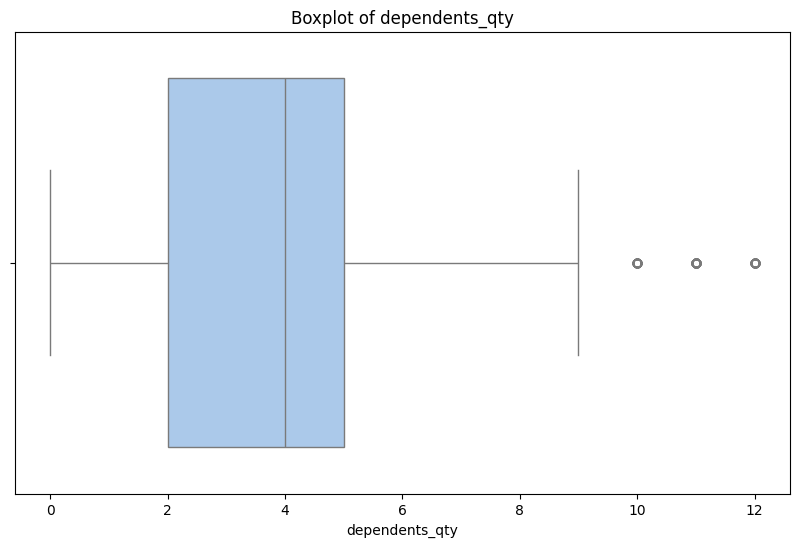

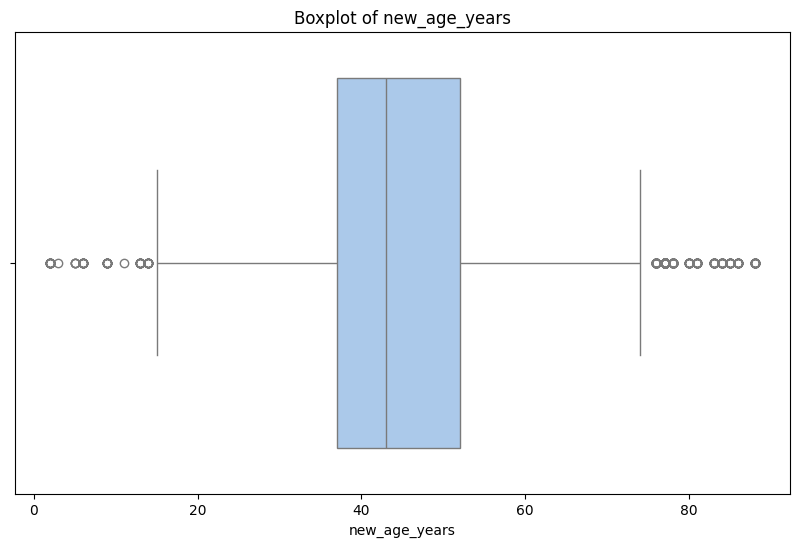

In [ ]:
# create boxplot for numerical features (excluding quantity because the value is 1 in all rows)
numerical_columns = ['dependents_qty', 'new_age_years']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=df_cleaned, palette='pastel')
    plt.title(f'Boxplot of {column}')

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# calling function to remove outliers
numerical_columns = ['dependents_qty', 'new_age_years']
df_cleaned_no_outliers = df_cleaned.copy()

for column in numerical_columns:
    df_cleaned_no_outliers = remove_outliers_iqr(df_cleaned_no_outliers, column)

# Now, df_cleaned_no_outliers contains the data without outliers.

<ipython-input-56-80e9c4dfa114>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, data=df_cleaned_no_outliers, palette='pastel')
<ipython-input-56-80e9c4dfa114>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, data=df_cleaned_no_outliers, palette='pastel')


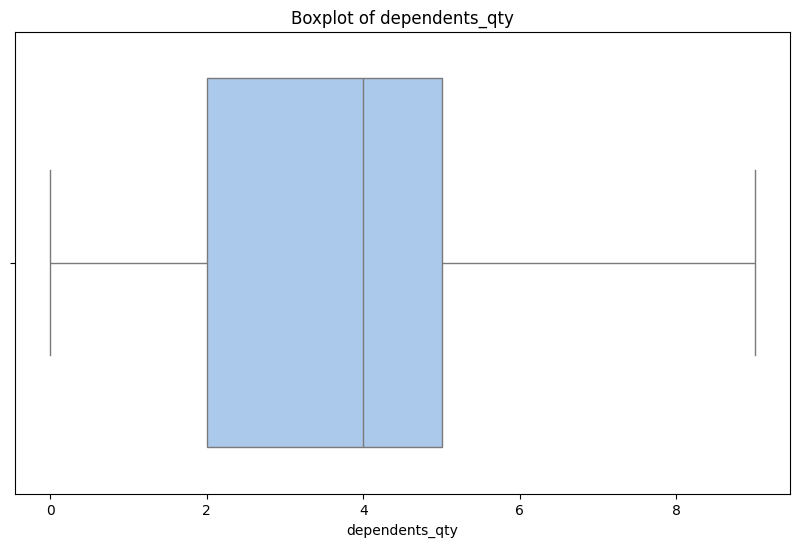

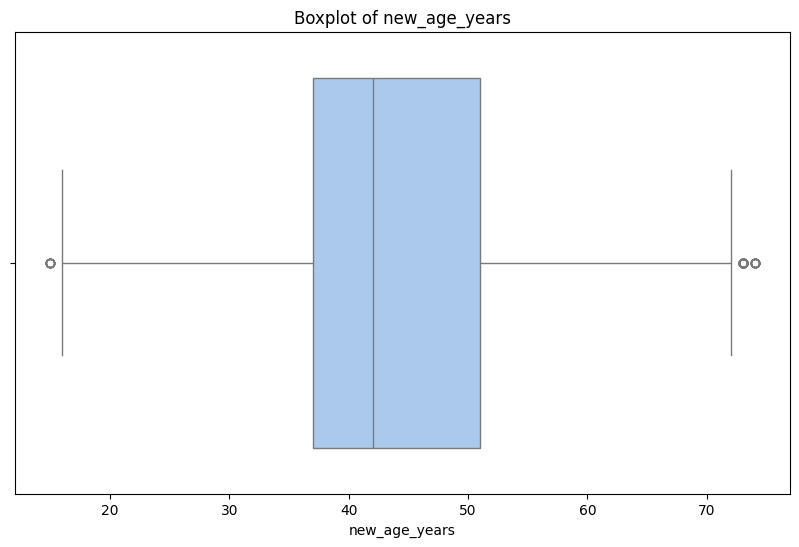

In [ ]:
# validate using boxplot that outliers have been removed
numerical_columns = ['dependents_qty', 'new_age_years']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=df_cleaned_no_outliers, palette='pastel')
    plt.title(f'Boxplot of {column}')

In [ ]:
# renaming df_cleaned_no_outliers back to df_cleaned
df_cleaned = df_cleaned_no_outliers.copy()

## **Block 3: Descriptive Statistics**

**1. Group Columns**

In [ ]:
# identify numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
numerical_columns

Index(['quantity', 'dependents_qty', 'new_age_years'], dtype='object')

In [ ]:
# identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
categorical_columns

Index(['agent_collect_note', 'client_collected', 'client_list', 'confirmed',
       'hamper_confirmation_type', 'hamper_type', 'title', 'address',
       'client_status_more_info', 'contact_frequency', 'household',
       'latest_contact_method', 'preferred_contact_methods',
       'preferred_languages', 'sex_new', 'status'],
      dtype='object')

**2. Deduplication based on unique_client to ensure that each client is counted only once**

In [ ]:
# deduplicating df_cleaned
deduplicated_df = df_cleaned.drop_duplicates(subset=['client_list'])

**3. Summary Statistics**

In [ ]:
# summary statistics
deduplicated_df.describe()

,collect_scheduled_date,datetime_from,datetime_to,pickup_date,quantity,Creation Date_x,Modified Date_x,date_reopened,dependents_qty,Creation Date_y,Modified Date_y,new_age_years
count,1009,1010,1007,892,1010.0,1010,1010,306,1010.000000,1009,1009,1010.000000
mean,2023-12-27 16:44:50.188305408,2023-12-27 21:26:19.009900800,2023-12-27 14:33:25.561072384,2023-12-27 18:44:55.896860928,1.0,2023-12-27 20:48:16.990099200,2024-03-05 13:12:45.504950528,2024-01-22 04:41:57.254901760,3.652475,2023-10-31 15:14:57.264618496,2024-04-05 00:34:44.479682816,43.930693
min,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-08-22 10:45:00,1.0,2023-07-27 15:57:00,2023-07-27 15:57:00,2023-01-06 19:11:00,0.000000,2022-11-28 14:54:00,2023-11-14 09:17:00,15.000000
25%,2023-11-16 04:00:00,2023-11-16 04:00:00,2023-11-16 04:00:00,2023-11-20 17:05:30,1.0,2023-11-16 16:07:00,2024-02-19 10:18:00,2023-10-04 18:41:00,2.000000,2023-09-29 16:10:00,2024-01-11 15:30:00,36.000000
50%,2023-11-29 04:00:00,2023-11-29 04:00:00,2023-11-29 04:00:00,2023-11-29 17:37:30,1.0,2023-11-29 17:08:00,2024-02-19 10:24:00,2023-12-21 02:47:00,3.000000,2023-09-29 16:42:00,2024-03-27 15:04:00,42.000000
75%,2024-01-09 04:00:00,2024-01-09 04:00:00,2024-01-08 16:00:00,2024-01-04 16:38:15,1.0,2024-01-07 17:36:15,2024-02-19 10:30:00,2024-04-05 18:16:45,5.000000,2023-09-29 17:12:00,2024-06-07 14:45:00,51.000000
max,2024-08-26 03:00:00,2024-08-26 03:00:00,2024-08-26 03:00:00,2024-08-22 17:51:00,1.0,2024-08-23 16:59:00,2024-08-23 16:59:00,2024-08-23 16:36:00,9.000000,2024-08-23 16:36:00,2024-08-26 15:02:00,74.000000
std,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.128438,NaN,NaN,11.229878


**4. Categorical Distribution**

In [ ]:

column = ['agent_collect_note', 'client_collected', 'client_list', 'confirmed',
       'hamper_confirmation_type', 'hamper_type', 'title', 'address',
       'client_status_more_info', 'contact_frequency', 'household',
       'latest_contact_method', 'preferred_contact_methods',
       'preferred_languages', 'sex_new', 'status']

for column in column:
    print(f"Value counts for {column}:")
    print(deduplicated_df[column].value_counts())
    print("\n")

Value counts for agent_collect_note:
agent_collect_note
No Note                                                                           563
The client picked up the hamper.                                                   32
picked up nov 27                                                                   19
picked up by self                                                                  17
picked up dec 04                                                                   15
Picked up the hamper himself                                                       14
Picked up hamper himself                                                           12
picked up by self                                                                  11
Picked up the hamper herself                                                       10
Client picked up the hamper herself                                                 9
Picked up the hamper herself.                                                       

In [ ]:
# Calculating percentage of clients that speak Arabic

# Calculate the total number of clients
total_clients = len(deduplicated_df)

# Filter clients who speak Arabic
arabic_speakers = deduplicated_df[deduplicated_df['preferred_languages'].str.contains('Arabic', case=False, na=False)]

# Calculate the number of Arabic speakers
num_arabic_speakers = len(arabic_speakers)

# Calculate the percentage of Arabic speakers
percentage_arabic_speakers = (num_arabic_speakers / total_clients) * 100

# Print the result
print(f"Percentage of clients who speak Arabic: {percentage_arabic_speakers:.2f}%")

Percentage of clients who speak Arabic: 55.94%


In [ ]:
deduplicated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 16598
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_collect_note         1010 non-null   object        
 1   client_collected           1010 non-null   object        
 2   client_list                1010 non-null   object        
 3   collect_scheduled_date     1009 non-null   datetime64[ns]
 4   confirmed                  1010 non-null   object        
 5   datetime_from              1010 non-null   datetime64[ns]
 6   datetime_to                1007 non-null   datetime64[ns]
 7   hamper_confirmation_type   1010 non-null   object        
 8   hamper_type                1010 non-null   object        
 9   pickup_date                892 non-null    datetime64[ns]
 10  quantity                   1010 non-null   int64         
 11  title                      1010 non-null   object        
 12  Creation D

In [ ]:
# remove rows with empty pickup date
deduplicated_df = deduplicated_df.dropna(subset=['pickup_date'])

In [ ]:
# validationg removal of rows with empty pickup date
deduplicated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 13 to 16591
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_collect_note         892 non-null    object        
 1   client_collected           892 non-null    object        
 2   client_list                892 non-null    object        
 3   collect_scheduled_date     892 non-null    datetime64[ns]
 4   confirmed                  892 non-null    object        
 5   datetime_from              892 non-null    datetime64[ns]
 6   datetime_to                890 non-null    datetime64[ns]
 7   hamper_confirmation_type   892 non-null    object        
 8   hamper_type                892 non-null    object        
 9   pickup_date                892 non-null    datetime64[ns]
 10  quantity                   892 non-null    int64         
 11  title                      892 non-null    object        
 12  Creation D

### **5. Insights**
- More than 50% of clients speak Arabic.
- Unique customer count is about 1010.
- There are only 3 numeric columns in the deduplicated dataframe.

## **Block 4: Data Visualization**

**1. Histograms**

Text(0.5, 0, 'Age')

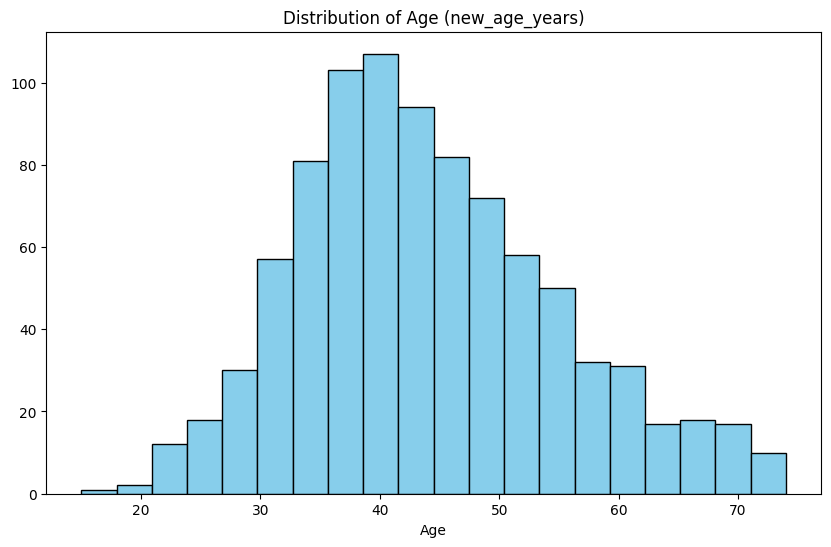

In [ ]:
# create histograms for new_age_years
plt.figure(figsize=(10, 6))
plt.hist(deduplicated_df['new_age_years'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age (new_age_years)')
plt.xlabel('Age')





In [ ]:
# Calculate mean
mean_values = deduplicated_df.mean(numeric_only=True)  # Specify numeric_only to avoid errors with non-numeric columns

# Calculate median
median_values = deduplicated_df.median(numeric_only=True)

# Calculate mode
mode_values = deduplicated_df.mode(numeric_only=True)  # Mode can return multiple values, so it's a DataFrame

# Display the results
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)

Mean:
 quantity           1.000000
dependents_qty     3.699552
new_age_years     44.075112
dtype: float64

Median:
 quantity           1.0
dependents_qty     4.0
new_age_years     42.0
dtype: float64

Mode:
    quantity  dependents_qty  new_age_years
0         1             1.0             38


**2. Gender distribution plot**

<ipython-input-69-6453b37e8410>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_new', data=deduplicated_df, palette='pastel')


Text(0, 0.5, 'Count')

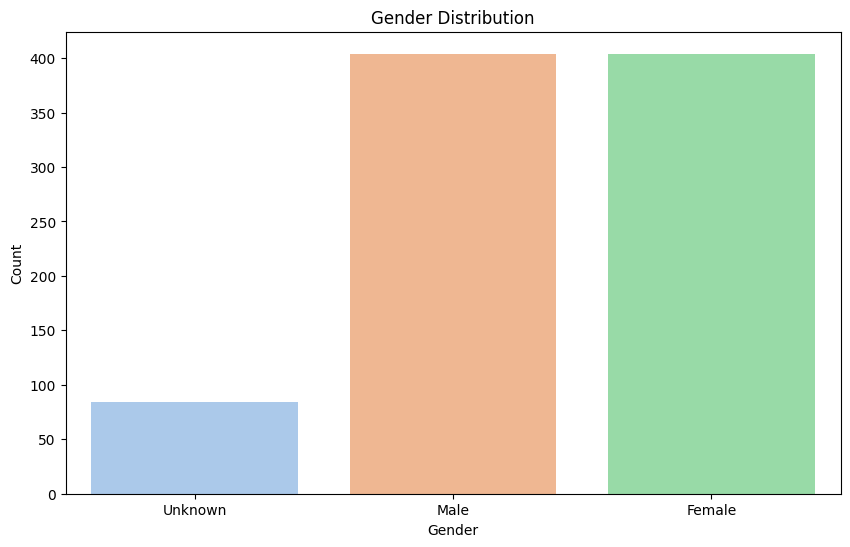

In [ ]:
# Create count plots for gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex_new', data=deduplicated_df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

**3. Language distribution**

In [ ]:
# count of languages in deduplicated_df
language_counts = deduplicated_df['preferred_languages'].value_counts()

# Set a threshold for the minimum number of occurrences
threshold = 10

# Get a list of languages below the threshold
other_languages = language_counts[language_counts < threshold].index

# Replace these languages with "Other"
deduplicated_df['preferred_languages_binned'] = deduplicated_df['preferred_languages'].replace(other_languages, 'Other')

<ipython-input-71-2bf59a8f2618>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_languages_binned', data=deduplicated_df, palette='pastel')


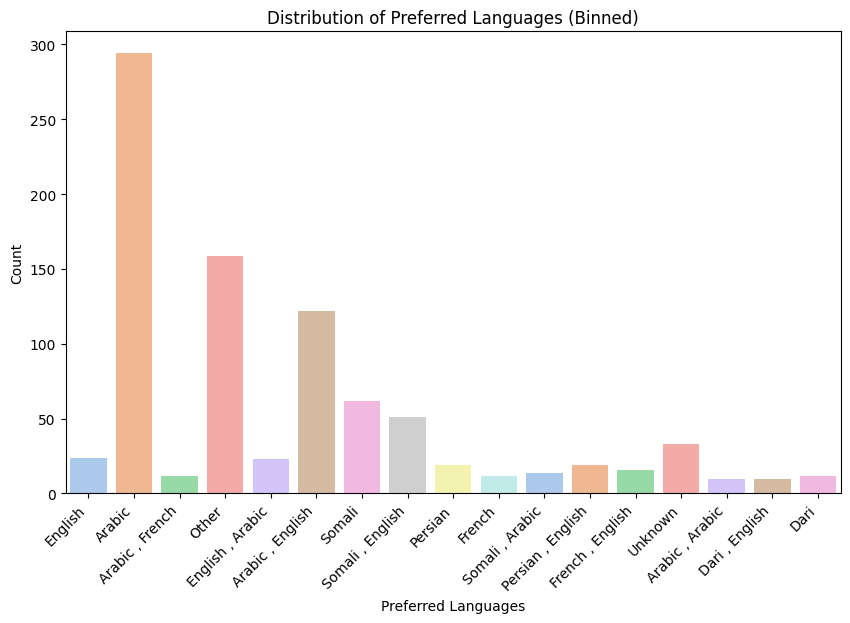

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='preferred_languages_binned', data=deduplicated_df, palette='pastel')
plt.title('Distribution of Preferred Languages (Binned)')
plt.xlabel('Preferred Languages')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

**4. Boxplots**

<ipython-input-72-58b1a0f1f6b0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, data=deduplicated_df, palette='pastel')
<ipython-input-72-58b1a0f1f6b0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, data=deduplicated_df, palette='pastel')


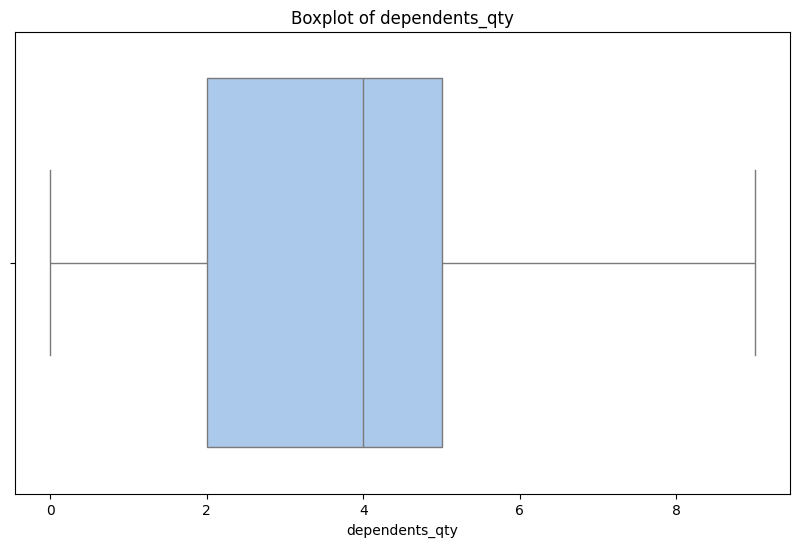

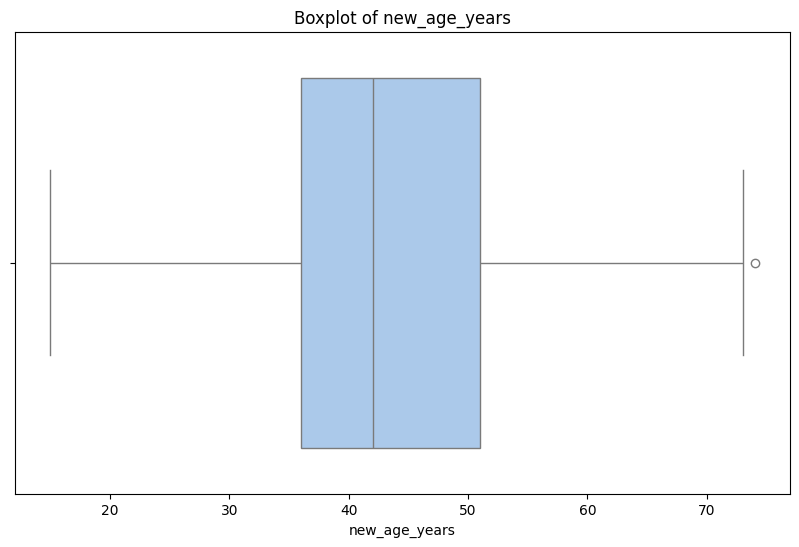

In [ ]:
# create boxplot for numerical features
numerical_columns = ['dependents_qty', 'new_age_years']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=deduplicated_df, palette='pastel')
    plt.title(f'Boxplot of {column}')

### **Summary of patterns or anomalies observed in the visualizations**
- Mean and median age are very close (precisely 42 and 43 years of age respectively.
- The ratio of male:female clients is approximately 1:1.
- Most clients are speak Arabic.


## **Block 5. Feature Relationships**

We will be building relationships amongst the features using the deduplcated dataframe. After deduplication, we observed there are some missing values

In [ ]:
deduplicated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 13 to 16591
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   agent_collect_note          892 non-null    object        
 1   client_collected            892 non-null    object        
 2   client_list                 892 non-null    object        
 3   collect_scheduled_date      892 non-null    datetime64[ns]
 4   confirmed                   892 non-null    object        
 5   datetime_from               892 non-null    datetime64[ns]
 6   datetime_to                 890 non-null    datetime64[ns]
 7   hamper_confirmation_type    892 non-null    object        
 8   hamper_type                 892 non-null    object        
 9   pickup_date                 892 non-null    datetime64[ns]
 10  quantity                    892 non-null    int64         
 11  title                       892 non-null    object        
 

**1. Create "hamper demand" column based on the number of visits per client**

In [ ]:
# Calculate hamper demand as the number of visits per client or group of interest
deduplicated_df['hamper demand'] = deduplicated_df.groupby('client_list')['client_list'].transform('count')

In [ ]:
# Heatmap to show relationship between hamper demand and numerical features
numerical_features = ['new_age_years', 'dependents_qty', 'hamper demand']
selected_data = deduplicated_df[numerical_features]

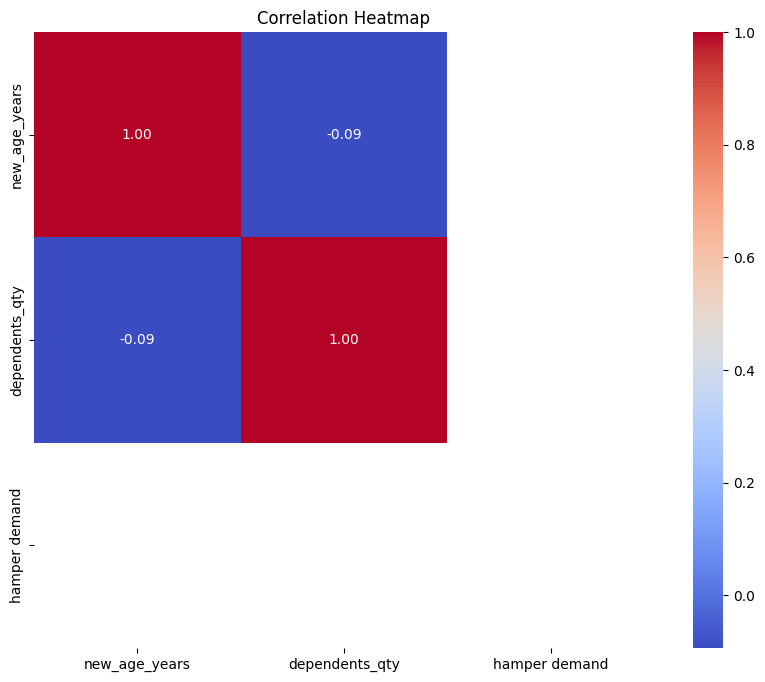

In [ ]:
correlation_matrix = selected_data.corr()
# print(correlation_matrix)

# print heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**2. Analyzing how certain selected_features (e.g., household, dependents quantity etc ) affect hamper demand using boxplots.**

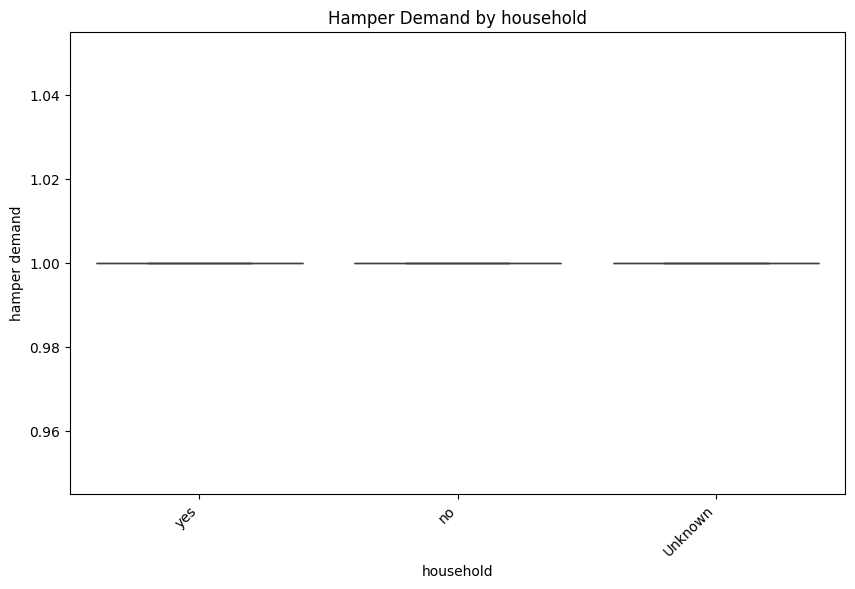

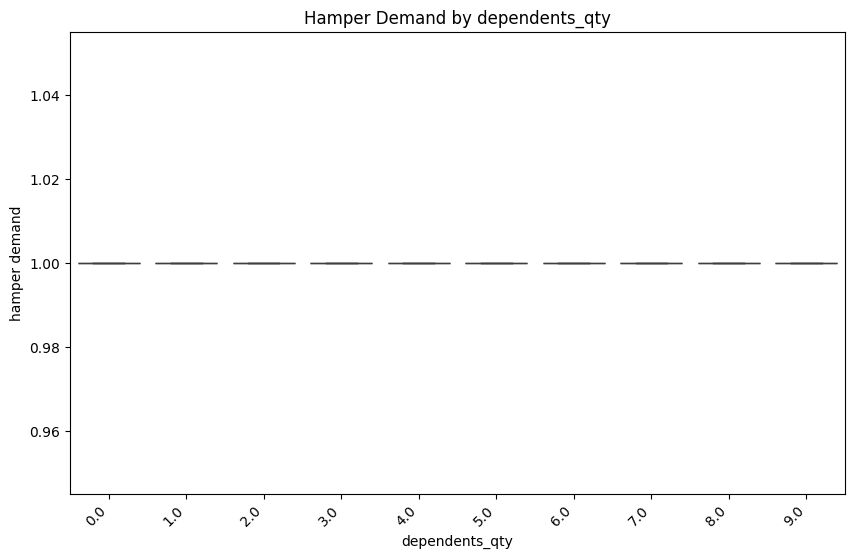

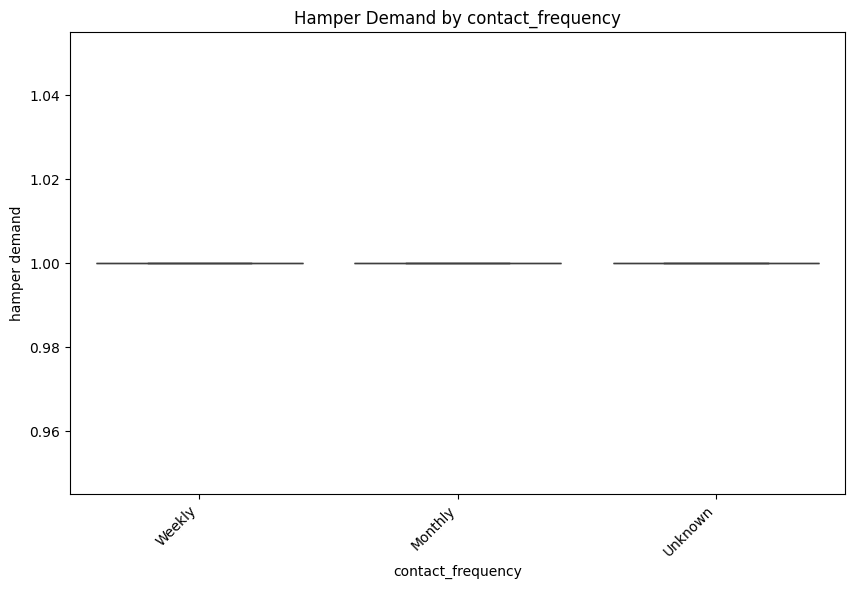

In [ ]:
# Using 'deduplicated_df' and 'hamper demand' is the target variable
selected_features = ['household', 'dependents_qty', 'contact_frequency']  # Add other categorical features as needed

for feature in selected_features:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.boxplot(x=feature, y='hamper demand', data=deduplicated_df)
    plt.title(f'Hamper Demand by {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

**3. Data Aggregation - how hamper demand changes over time**

In [ ]:
import pandas as pd

# Convert 'pickup_date' to datetime, handling errors
deduplicated_df['pickup_date'] = pd.to_datetime(deduplicated_df['pickup_date'], errors='coerce')

# Extract month from 'pickup_date'
deduplicated_df['pickup_month'] = deduplicated_df['pickup_date'].dt.month

# Group by month and count client visits (hamper demand)
monthly_demand = deduplicated_df.groupby('pickup_month')['client_list'].count()

# Print the monthly demand
print(monthly_demand)

pickup_month
1      62
2      41
3      46
4      13
5      11
6      17
7      26
8      18
9      11
10     14
11    466
12    167
Name: client_list, dtype: int64


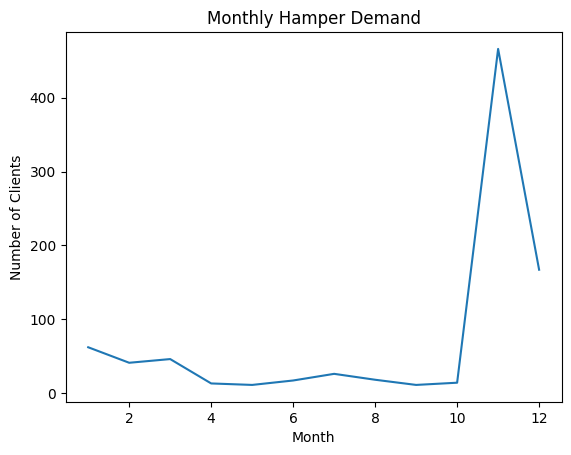

In [ ]:
monthly_demand.plot(kind='line')
plt.title('Monthly Hamper Demand')
plt.xlabel('Month')
plt.ylabel('Number of Clients')
plt.show()

**3. Data Aggregation - how hamper demand relates with household size**

In [ ]:
household_demand = df_cleaned.groupby('household')['client_list'].count()

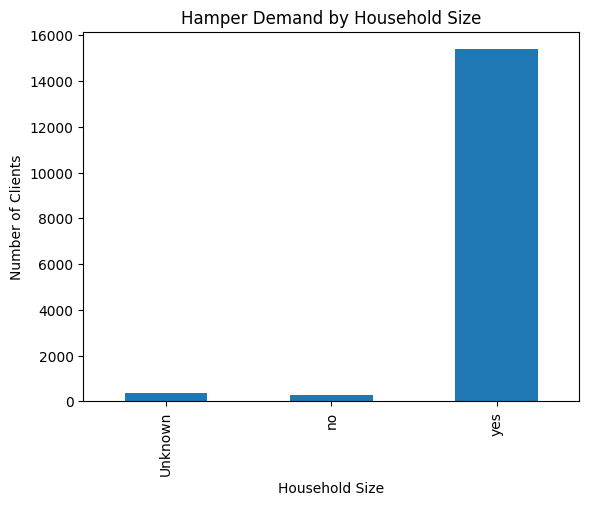

In [ ]:
household_demand.plot(kind='bar')
plt.title('Hamper Demand by Household Size')
plt.xlabel('Household Size')
plt.ylabel('Number of Clients')
plt.show()

## **Summary of key findings**
- There exist a weak relationship between hamper demand and the selected variables (however it does not mean there is zero relationship, as correlation does not imply causation).
- Clients with higher number of dependents make more demands for hampers
- There is a higher demand for hamper during the winter months (particularly at the end of the year) than during summer.
- Clients that live in household have more impact on the demand for hamper. They request for hampers more frequently.

In [ ]:
# export dataframe
deduplicated_df.to_csv('IFSSA_cleaned_dataset.csv', index=False)